In [1]:
from sympy import *


In [3]:
init_printing()
from sympy.matrices import *
from sympy.plotting import plot3d
#from sympy.plotting.plot import unset_show
#unset_show()

an1,an,dn1,vn1,dn,vn,h,beta,gamma,zeta,omega,A1,A2=symbols('a_{n+1} a_n d_{n+1} v_{n+1} d_n v_n h \\beta \gamma \zeta \omega A_1 A_2')
h,beta,gamma,zeta,omega,Omega,eta=symbols('h \\beta \gamma \zeta \omega \Omega \eta')


As1=Matrix([[1+beta*h**2*omega**2,h**2*beta*2*omega*zeta],[gamma*h*omega**2,1 + gamma*h*2*omega*zeta]])

As2=Matrix([[1-h**2/2*(1-2*beta)*omega**2,h-h**2*(0.5-beta)*2*omega*zeta],[-h*(1-gamma)*omega**2,1-2*h*(1-gamma)*zeta*omega]])

As=As1.solve(As2)
simplify(0.5*det(simplify(As.subs(omega,Omega/h))))
simplify(0.5*trace(simplify(As.subs(omega,Omega/h))))
eigvals_s=list(As.subs(omega, Omega/h).eigenvals().keys())


A1=Matrix([[1,0, -h**2*beta],[0, 1, -h*gamma],[omega**2,2*zeta*omega, 1]])

#A1=Matrix([[1,0, -h**2*beta],[0, 1, -h*gamma],[0,0,0]])

#with this one, Eq. 3.17 gives an oscillating response
A2=Matrix([[1,h,h**2*(0.5-beta)],[0,1,h*(1-gamma)],[0,0,0]])

# with this one, all the other things work -> equivalent to As
A2=Matrix([[1,h,h**2*(0.5-beta)],[0,1,h*(1-gamma)],[omega**2,2*zeta*omega, 1]])

A=A1.solve(A2)

simplify(1/2*trace(simplify(A.subs(omega,Omega/h))))

eigvals=list(A.subs(omega, Omega/h).eigenvals().keys())

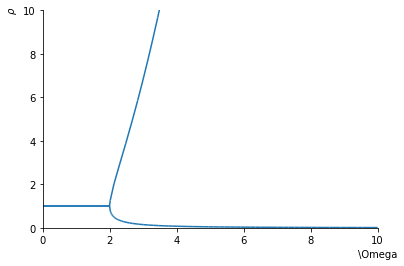

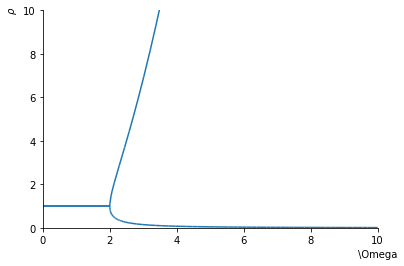

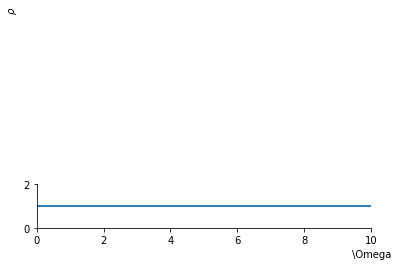

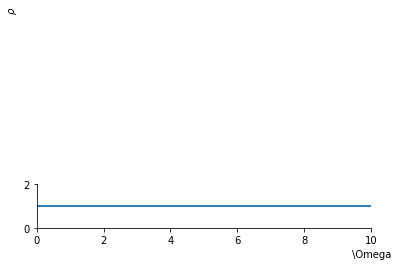

In [5]:
p11=plot(abs(eigvals[1].subs(zeta,0).subs(beta,0).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p21=plot(abs(eigvals[2].subs(zeta,0).subs(beta,0).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p11.append(p21[0])
p11.show()

p12=plot(abs(eigvals_s[0].subs(zeta,0).subs(beta,0).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p22=plot(abs(eigvals_s[1].subs(zeta,0).subs(beta,0).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p12.append(p22[0])
p12.show()

p13=plot(abs(eigvals_s[0].subs(zeta,0).subs(beta,0.25).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p23=plot(abs(eigvals_s[1].subs(zeta,0).subs(beta,0.25).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p13.append(p23[0])
p13.show()

p14=plot(abs(eigvals[1].subs(zeta,0).subs(beta,0.25).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p24=plot(abs(eigvals[2].subs(zeta,0).subs(beta,0.25).subs(gamma,0.5)),(Omega,0,10),ylim=(0,10),ylabel='$\\rho$', show=False)
p14.append(p24[0])
p14.show()

This is a <b>test</b>

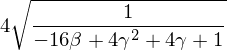

In [7]:
root=eigvals_s[0].subs(zeta,0)
solve(root.args[1].args[3],beta)[0].subs(Omega,oo) # unconditional stability complex roots
solve(root.args[1].args[3],Omega)[1] # bifurcation limit for conditional stability

In [6]:
from sympy import *
init_printing()
beta, gamma, alphaf, alpham = symbols('\\beta \\gamma \\alpha_f \\alpha_m')
beta_=(Eq(beta,1/4*(1+alphaf-alpham)**2))
gamma_=(Eq(gamma,1/2-alpham+alphaf))

In [9]:
linsolve((beta_,gamma_),(alphaf,alpham))